<a href="https://colab.research.google.com/github/jhcool1988/teamdata/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jhcool1988/teamdata/master/son.csv')
df.head()

df1 = df[['shgls']]
df1.head()

,shgls
0,0.47619
1,0.47619
2,0.00000
3,0.47619
4,0.00000


     shgls
0  0.47619
1  0.47619
2  0.00000
3  0.47619
4  0.00000


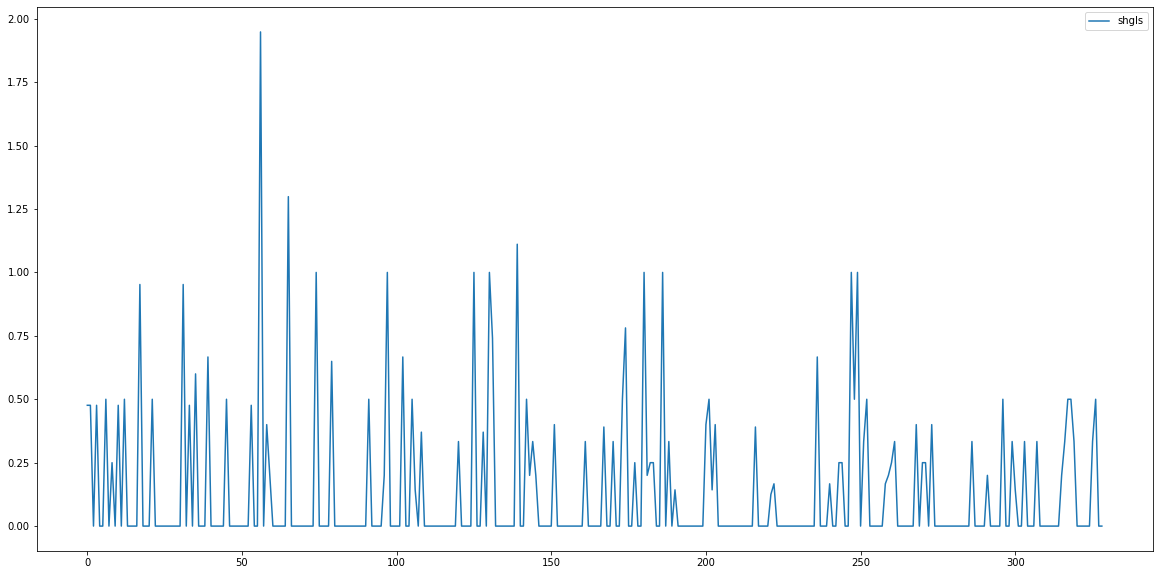

In [10]:
from pandas.tseries.offsets import MonthEnd

# df1 = df1.set_index('idx') 
print(df1.head())
df1.plot(figsize=(20,10))

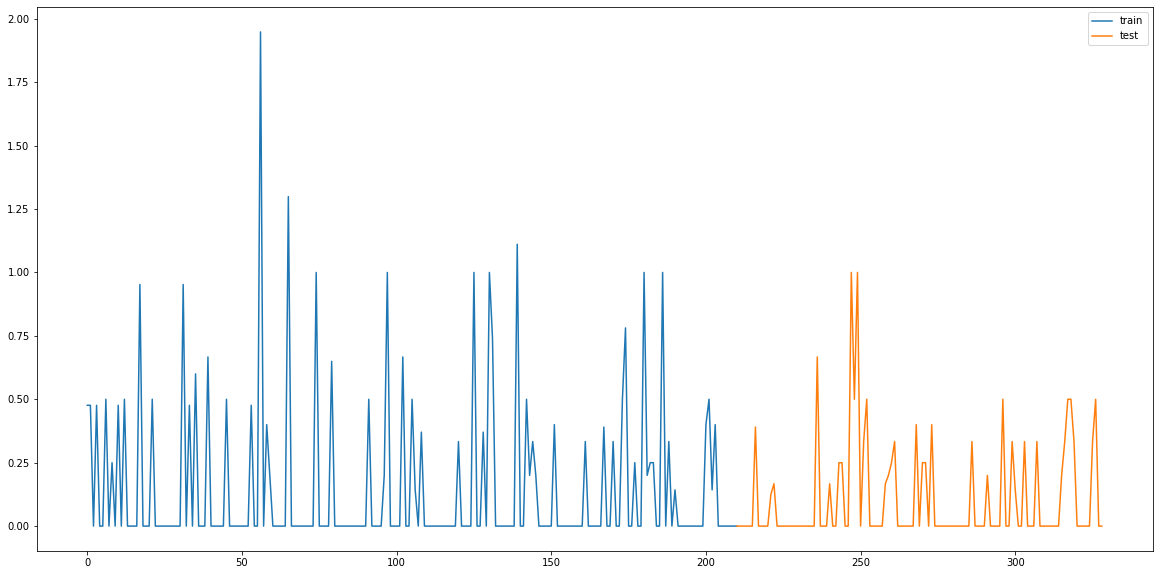

In [11]:
train = df1.loc[:210]
test = df1.loc[210:329]

ax = train.plot()
test.plot(ax=ax, figsize=(20,10))
plt.legend(['train', 'test'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.24444444],
       [0.24444444],
       [0.        ],
       [0.24444444],
       [0.        ],
       [0.        ],
       [0.25666667],
       [0.        ],
       [0.12833333],
       [0.        ],
       [0.24444444],
       [0.        ],
       [0.25666667],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.48888889],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.25666667],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.48888889],
       [0.        ],
       [0.24444444],
       [0.        ],
       [0.308     ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.34222222],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.25666667],
       [0.        ],
       [0.   

In [13]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()


,Scaled
0,0.244444
1,0.244444
2,0.000000
3,0.244444
4,0.000000


In [14]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
0,0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,0.000000,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.256667,0.000000,0.000000,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,0.256667,0.000000,0.000000,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN,NaN
8,0.128333,0.000000,0.256667,0.000000,0.000000,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN,NaN
9,0.000000,0.128333,0.000000,0.256667,0.000000,0.000000,0.244444,0.000000,0.244444,0.244444,NaN,NaN,NaN


In [15]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]


In [16]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
12,0.000000,0.244444,0.000000,0.128333,0.000000,0.256667,0.000000,0.000000,0.244444,0.000000,0.244444,0.244444
13,0.256667,0.000000,0.244444,0.000000,0.128333,0.000000,0.256667,0.000000,0.000000,0.244444,0.000000,0.244444
14,0.000000,0.256667,0.000000,0.244444,0.000000,0.128333,0.000000,0.256667,0.000000,0.000000,0.244444,0.000000
15,0.000000,0.000000,0.256667,0.000000,0.244444,0.000000,0.128333,0.000000,0.256667,0.000000,0.000000,0.244444
16,0.000000,0.000000,0.000000,0.256667,0.000000,0.244444,0.000000,0.128333,0.000000,0.256667,0.000000,0.000000


In [17]:
y_train.head()

,Scaled
12,0.256667
13,0.000000
14,0.000000
15,0.000000
16,0.000000


In [18]:
X_train = np.array(X_train)
X_test= np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(199, 12)
[[0.         0.24444444 0.         ... 0.         0.24444444 0.24444444]
 [0.25666667 0.         0.24444444 ... 0.24444444 0.         0.24444444]
 [0.         0.25666667 0.         ... 0.         0.24444444 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.20533333 0.         0.        ]]
(199, 1)
[[0.25666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48888889]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.25666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48888889]
 [0.        ]
 [0.24444444]
 [0.        ]
 [0.308     ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.34222222]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.25666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0. 

In [19]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(199, 12, 1)
[[[0.        ]
  [0.24444444]
  [0.        ]
  ...
  [0.        ]
  [0.24444444]
  [0.24444444]]

 [[0.25666667]
  [0.        ]
  [0.24444444]
  ...
  [0.24444444]
  [0.        ]
  [0.24444444]]

 [[0.        ]
  [0.25666667]
  [0.        ]
  ...
  [0.        ]
  [0.24444444]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.20533333]
  [0.        ]
  [0.        ]]]
[[0.25666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48888889]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.25666667]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.48888889]
 [0.        ]
 [0.24444444]
 [0.        ]
 [0.308     ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.342

In [30]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [31]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])


Epoch 1/100
199/199 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 2/100
199/199 [==============================] - 0s 216us/step - loss: 0.0243
Epoch 3/100
199/199 [==============================] - 0s 206us/step - loss: 0.0240
Epoch 4/100
199/199 [==============================] - 0s 213us/step - loss: 0.0242
Epoch 00004: early stopping


In [42]:
print(X_test_t)

[[[0.06416667]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.08555556]
  [0.06416667]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.08555556]
  [0.06416667]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.17111111]
  [0.        ]
  [0.        ]
  ...
  [0.17111111]
  [0.10266667]
  [0.        ]]

 [[0.25666667]
  [0.17111111]
  [0.        ]
  ...
  [0.25666667]
  [0.17111111]
  [0.10266667]]

 [[0.        ]
  [0.25666667]
  [0.17111111]
  ...
  [0.25666667]
  [0.25666667]
  [0.17111111]]]


In [45]:
y_pred = model.predict(X_test_t)
print(y_pred)

[[0.07451454]
 [0.07547943]
 [0.07600197]
 [0.0763876 ]
 [0.07647834]
 [0.07601047]
 [0.07505652]
 [0.07382149]
 [0.07400048]
 [0.07400987]
 [0.07370315]
 [0.07297796]
 [0.07190961]
 [0.0712737 ]
 [0.0712737 ]
 [0.07322638]
 [0.0736966 ]
 [0.07422941]
 [0.07481997]
 [0.07596044]
 [0.07673389]
 [0.0774879 ]
 [0.07889098]
 [0.08021139]
 [0.08042242]
 [0.07968177]
 [0.08138371]
 [0.08159322]
 [0.08634886]
 [0.08850952]
 [0.09165591]
 [0.09511556]
 [0.09760743]
 [0.09947465]
 [0.09993207]
 [0.09978543]
 [0.09866984]
 [0.09674585]
 [0.08955181]
 [0.08546694]
 [0.08194978]
 [0.08082806]
 [0.07864527]
 [0.07760566]
 [0.07851601]
 [0.0793204 ]
 [0.07984671]
 [0.08102317]
 [0.08045963]
 [0.07957234]
 [0.07858552]
 [0.07720926]
 [0.07794468]
 [0.07909387]
 [0.08023421]
 [0.08123923]
 [0.08188914]
 [0.08181223]
 [0.08101663]
 [0.07901794]
 [0.0779345 ]
 [0.07586981]
 [0.07405129]
 [0.07275491]
 [0.0712737 ]
 [0.0722575 ]
 [0.072496  ]
 [0.0727666 ]
 [0.07306705]
 [0.07339082]
 [0.07432344]
 [0.07

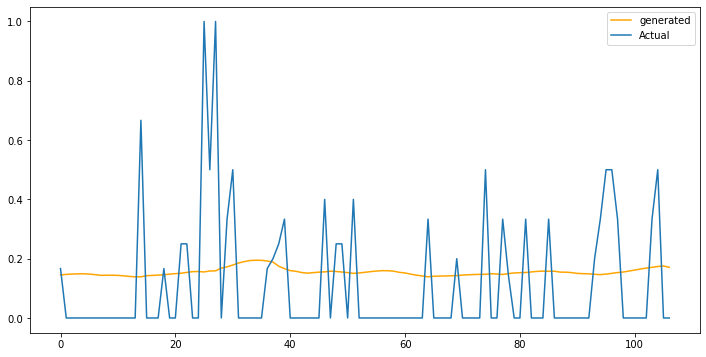

In [47]:
preds = model.predict(X_test_t)
plt.figure(figsize=(12,6))
plt.plot(sc.inverse_transform(preds.reshape(-1,1)),
        label='generated',
        color='orange')
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)),
        label='Actual')
plt.legend()
plt.show()

In [44]:
preds

array([[0.07451454],
       [0.07547943],
       [0.07600197],
       [0.0763876 ],
       [0.07647834],
       [0.07601047],
       [0.07505652],
       [0.07382149],
       [0.07400048],
       [0.07400987],
       [0.07370315],
       [0.07297796],
       [0.07190961],
       [0.0712737 ],
       [0.0712737 ],
       [0.07322638],
       [0.0736966 ],
       [0.07422941],
       [0.07481997],
       [0.07596044],
       [0.07673389],
       [0.0774879 ],
       [0.07889098],
       [0.08021139],
       [0.08042242],
       [0.07968177],
       [0.08138371],
       [0.08159322],
       [0.08634886],
       [0.08850952],
       [0.09165591],
       [0.09511556],
       [0.09760743],
       [0.09947465],
       [0.09993207],
       [0.09978543],
       [0.09866984],
       [0.09674585],
       [0.08955181],
       [0.08546694],
       [0.08194978],
       [0.08082806],
       [0.07864527],
       [0.07760566],
       [0.07851601],
       [0.0793204 ],
       [0.07984671],
       [0.081

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.layers import Dropout, Flatten

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [35]:
def feed_forward():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mae', optimizer='adam')
    return model

In [36]:
def simple_gru():
    model = Sequential()
    model.add(GRU(32,
                  input_shape=(1, 7),
                  dropout=0.1,
                  recurrent_dropout=0.1))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mae',
                  optimizer='adam',
                  metrics=['mean_absolute_error'])
    return model

In [37]:
# 단순한 lstm
def simple_lstm():
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, 7)))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mae', optimizer='adam')
    return model

In [38]:
# lstm 스택
def lstm_stacked():
    model = Sequential()
    model.add(LSTM(16,
                   input_shape=(12, 1),
                   dropout=0.1,
                   recurrent_dropout=0.2,
                   return_sequences=True))
    model.add(LSTM(16,
                   dropout=0.1,
                   recurrent_dropout=0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mae', optimizer='adam')
    return model

In [39]:
# 손실값을 플롯하는 헬퍼 함수
def plot_losses(network):
    plt.plot(network.history['loss'], label='loss')
    plt.plot(network.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    plt.clf()

In [40]:
# 예측값을 플롯하는 헬퍼 함수
def plot_predictions(model, y_test=y_test):
    preds = model.predict(X_test_t)
    plt.figure(figsize=(12,6))
    plt.plot(sc.inverse_transform(preds.reshape(-1,1)),
            label='generated',
            color='orange')
    plt.plot(sc.inverse_transform(y_test.reshape(-1,1)),
            label='Actual')
    plt.legend()
    plt.show()


Training: feed_forward
Training: simple_gru
Training: simple_lstm
Training: lstm_stacked
Train on 199 samples, validate on 107 samples
Epoch 1/50
199/199 [==============================] - 1s 5ms/step - loss: 0.0761 - val_loss: 0.0628
Epoch 2/50
199/199 [==============================] - 0s 328us/step - loss: 0.0775 - val_loss: 0.0596
Epoch 3/50
199/199 [==============================] - 0s 318us/step - loss: 0.0744 - val_loss: 0.0594
Epoch 4/50
199/199 [==============================] - 0s 311us/step - loss: 0.0742 - val_loss: 0.0592
Epoch 5/50
199/199 [==============================] - 0s 287us/step - loss: 0.0743 - val_loss: 0.0582
Epoch 6/50
199/199 [==============================] - 0s 347us/step - loss: 0.0740 - val_loss: 0.0582
Epoch 7/50
199/199 [==============================] - 0s 289us/step - loss: 0.0734 - val_loss: 0.0584
Epoch 8/50
199/199 [==============================] - 0s 279us/step - loss: 0.0734 - val_loss: 0.0584
Epoch 9/50
199/199 [==============================]

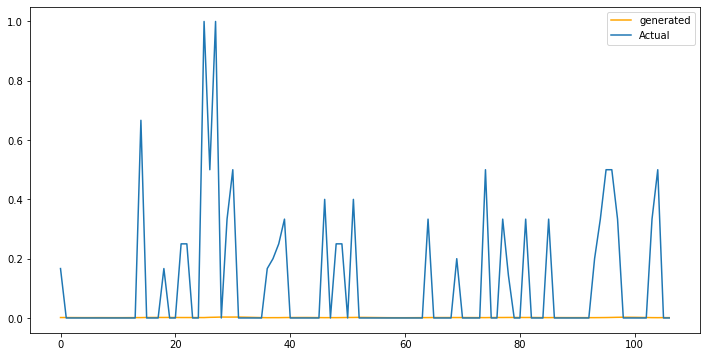

(<keras.callbacks.callbacks.History at 0x7f60d0b937b8>,
 <keras.engine.sequential.Sequential at 0x7f60d100a2b0>)

In [41]:
def train_network(list, X_train_t, y_train, epochs=5):
    for net in list:
        network_name = str(net).split(' ')[1]
        filepath = network_name + "_epoch-{epoch:02d}-loss-{loss:.4f}-.hdf5"
        print('Training:', network_name)

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='loss',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='min')
    callbacks_list = [checkpoint]
    model = net()
    
    network = model.fit(X_train_t, y_train,
                            validation_data=(X_test_t, y_test),
                            epochs=epochs,
                            batch_size=64,
                            callbacks=callbacks_list)
    model.summary()
    plot_predictions(model, y_test)

    return network, model

all_networks = [feed_forward,
                simple_gru,
                simple_lstm,
                lstm_stacked]
train_network(all_networks, X_train_t, y_train, epochs=50)